Question 11: -38.443856579112634


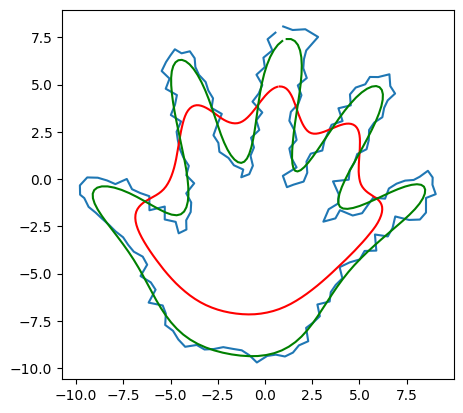

In [5]:
#%% 11 - Curve smoothing
# Answer (a)

# taken from weekly solutions at gitlab 
def regularization_matrix(N, alpha, beta):
    """An NxN matrix for imposing elasticity and rigidity to snakes.
    Arguments: alpha is weigth for second derivative (elasticity),
    beta is weigth for (-)fourth derivative (rigidity)."""
    d = alpha*np.array([-2, 1, 0, 0]) + beta*np.array([-6, 4, -1, 0])
    D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=int)
    A = d[np.minimum(D,len(d)-1)]
    return(np.linalg.inv(np.eye(N)-A))

# taken from weekly solutions at gitlab
def curve_length(X):
    d = X - np.roll(X, shift=1, axis=0)
    d = (d**2).sum(axis=1)
    d = (np.sqrt(d)).sum()
    return(d)
    
X = np.loadtxt('data/hand_noisy.txt')

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1])
ax.set_aspect('equal')

X_alpha = regularization_matrix(X.shape[0], 100, 0) @ X
X_beta = regularization_matrix(X.shape[0], 0, 100) @ X

ax.plot(X_alpha[:, 0], X_alpha[:, 1], 'r')
ax.plot(X_beta[:, 0], X_beta[:, 1], 'g')

d = curve_length(X_alpha) - curve_length(X_beta)
print(f'Question 11: {d}')

Original curve length: 110.114
X_alpha curve length (α=100, β=0): 41.072
X_beta curve length (α=0, β=100): 79.516
Question 11: -38.443857


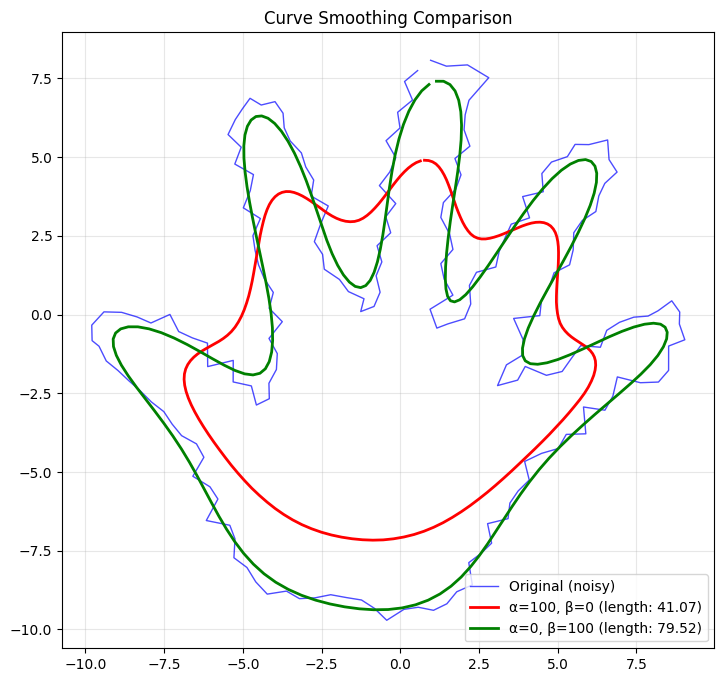

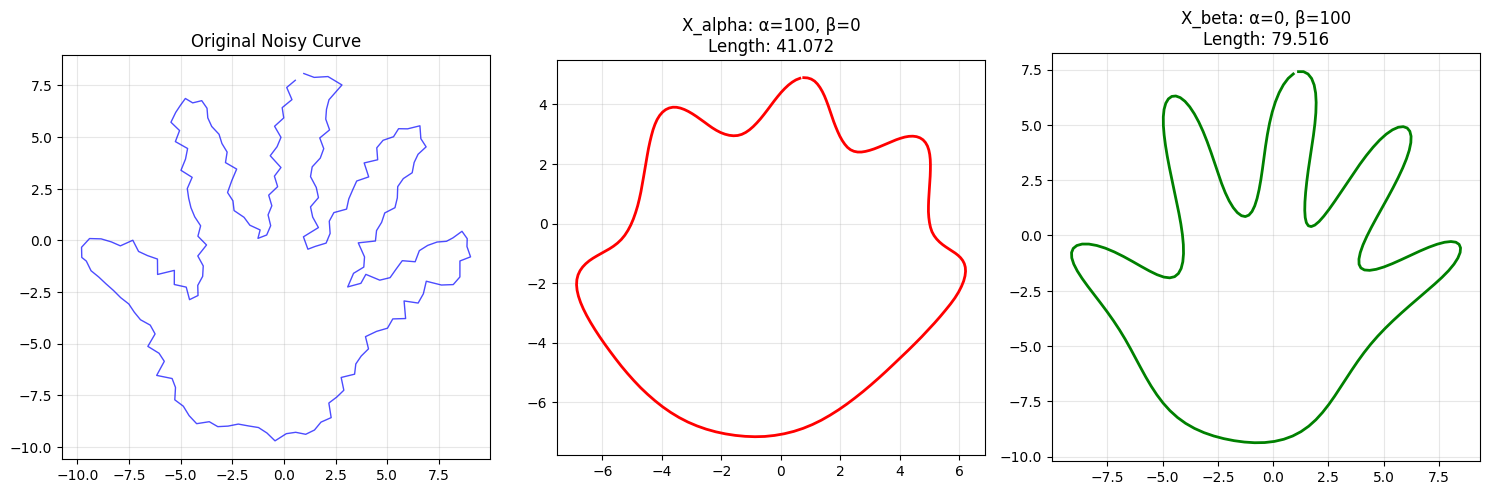

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def regularization_matrix(N, alpha, beta):
    """An NxN matrix for imposing elasticity and rigidity to snakes.
    Arguments: alpha is weight for second derivative (elasticity),
    beta is weight for (-)fourth derivative (rigidity)."""
    d = alpha*np.array([-2, 1, 0, 0]) + beta*np.array([-6, 4, -1, 0])
    D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=int)
    A = d[np.minimum(D,len(d)-1)]
    return(np.linalg.inv(np.eye(N)-A))

def curve_length(X):
    """Compute the length of a closed curve using np.roll"""
    d = X - np.roll(X, shift=1, axis=0)
    d = (d**2).sum(axis=1)
    d = (np.sqrt(d)).sum()
    return(d)

# Load the noisy hand data
X = np.loadtxt('data/hand_noisy.txt')

# Apply smoothing with different parameters
X_alpha = regularization_matrix(X.shape[0], 100, 0) @ X  # High alpha, zero beta
X_beta = regularization_matrix(X.shape[0], 0, 100) @ X   # Zero alpha, high beta

# Compute curve lengths
length_alpha = curve_length(X_alpha)
length_beta = curve_length(X_beta)
length_original = curve_length(X)

# Compute the difference
d = length_alpha - length_beta

# Display results
print(f"Original curve length: {length_original:.3f}")
print(f"X_alpha curve length (α=100, β=0): {length_alpha:.3f}")
print(f"X_beta curve length (α=0, β=100): {length_beta:.3f}")
print(f"Question 11: {d:.6f}")

# Plot all curves for comparison
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X[:, 0], X[:, 1], 'b-', alpha=0.7, linewidth=1, label='Original (noisy)')
ax.plot(X_alpha[:, 0], X_alpha[:, 1], 'r-', linewidth=2, label=f'α=100, β=0 (length: {length_alpha:.2f})')
ax.plot(X_beta[:, 0], X_beta[:, 1], 'g-', linewidth=2, label=f'α=0, β=100 (length: {length_beta:.2f})')
ax.set_aspect('equal')
ax.legend()
ax.set_title('Curve Smoothing Comparison')
ax.grid(True, alpha=0.3)
plt.show()

# Individual plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(X[:, 0], X[:, 1], 'b-', alpha=0.7, linewidth=1)
axes[0].set_title('Original Noisy Curve')
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

axes[1].plot(X_alpha[:, 0], X_alpha[:, 1], 'r-', linewidth=2)
axes[1].set_title(f'X_alpha: α=100, β=0\nLength: {length_alpha:.3f}')
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)

axes[2].plot(X_beta[:, 0], X_beta[:, 1], 'g-', linewidth=2)
axes[2].set_title(f'X_beta: α=0, β=100\nLength: {length_beta:.3f}')
axes[2].set_aspect('equal')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()